# Python & Metabolism Tutorial: A Complete Introduction for Beginners

Genome-scale metabolic models are used to engineer novel pathways into microorganisms, such as E. Coli and yeast. These novel pathways are used to produce biofuels or other commodity chemicals. In this tutorial, we will go through how to visualize genetic engineering in E coli and how to select genes to increase growth rates. 

## 1.0 Visualizing Pathways using Escher

Escher is a visualization tool that can be helpful to visualize and analyze changes in metabolic pathways. In this part of the tutorial you will be loading the general (less detailed) version of a metabolic map of E. coli, a bacteria. You will be able to see all of the main, central parts of metabolism for this organism. 

> Start by navigating your browser to https://escher.github.io/#/


> Under the "Map" tab, select "Core Metabolism (e_coli core)"


> Click "Load Map"


* You should see a map that looks like this:

<img src="CHEM430_DataExploration4/ecoli_core.png" style="max-width:100%; width: 30%; max-width: none">


* Hover your cursor over the different reactions (links) and metabolites (nodes) in the map to see their description and full names

* Navigate your mouse to the side bar on the left of your screen, you can test out the zoom, the search, and the addition functions

> use command F (or your computer's find function) to locate "glc__D_e" -> this refers to extracellular glucose that is coming into the cell

### A note on how to understand the visual components of the metabolic pathway

 > Each link (or arrow) represents an enzyme or a reaction
 
 > Each node (or ball) represents a metabolite or cofactor that is being consumed or created in a reaction
 
 
 #### A few key concepts to understand: 
 
 * The connectivity of the metabolic pathway is a key property that enables cells to function and grow
 * Some pathways are redundant, and so, if the cell "looses" a protein in a redundant pathway, it can turn to an alternative one to continue growing
 * Some pathways are essential, which means, if the cell "looses" a protein in an essential pathway, it can no longer grow and will die
 * "Loosing" a protein can happen if a mutation occurs that disrupts the function of the enzyme

## Exercise

**Try on your own**

1. Find all the glycolysis pathway steps; list out their Map-version IDs 

2. Find all metabolites that are involved in the  glycolysis steps, list out their Map-version IDs 

    HINT #1: Hexokinase is not shown but "glucose-6-phosphate isomerase" has a Map-version ID of PGI


   


## 2.0 Visualizing genetic engineering


You can also use the Escher tool to visualize how the metabolic network will change in response to a gene deletion.
Genes can be "deleted" from genomes such that the cell can no longer access that genetic material to make its 
encoding protein. We often delete genes to understand their roles and functions within entire systems.

> Start by navigating your browser to https://escher.github.io/#/


> Under the "Escher Maps" tab, select "Escher-FBA"


> Click "Launch Escher-FBA"


* You should see a map that looks similar to the "e coli core metabolism" map from section 1.0. The main difference is that the links are colored in different colors, which represent how much metabolic flux is moving through that reaction.

<img src="CHEM430_DataExploration4/escher.png" style="max-width:100%; width: 30%; max-width: none">

### What is metabolic flux?

 > metabolic flux represents the amount of metabolites moving through a chemical reaction
 
 > in other words, flux is proportional to the number of reactants converted to products
 
 
 #### A few key concepts to understand: 
 
* the higher the metabolic flux, the more metabolites are being consumed/produced in that enzymatic reation
* the metabolic flux varies reaction to reaction - some enzymes carry high flux, others low
* the metabolic flux can change depending on environment and genetic modifications
* environmental changes occur in different nutrient environments whereas genetic changes (like gene deletions) can alter metabolic fluxes across the entire metabolic system

### What is FBA?

 > FBA is a computational approach that calculates the flux across all reactions in a metabolic network model
 
 > the model you are working with right now is referred to as the "E coli core metabolic model"
 
 
 #### Why do fluxes matter? 
 
* By computing flux, we can computationally predict the growth rate of the bacteria
* Note on your screen you should see:

> Current Flux: Biomass_Ecoli_core_w_GAM


> Flux Through Objective: 0.874

* The "Current Flux" is referring to the flux calculated for the model, the "Flux through objective" refers to the growth rate.

### "Knocking out genes"

You can use Escher-FBA to visualize the metabolic flux effects of deleting genes

> Hover your mouse over a reaction and watch a small box pop up. In the box is an option "Knock out" - once you click this, you should see the flux for that reaction go to zero.



## Exercise

**Try on your own**

1. Find "SUCOAS," which is a reaction in the Citric Acid Cycle (which we learn about in this class). Hover your mouse over this reaction and click the option "Knock out." This will "delete" this gene from the bacteria so that it can no longer be of use to the cell. What happens to the flux map after doing so? What happens to the "Flux Through Objective"?

2. Knock out the reactions in glycolysis using the same approach, what happens after doing so? Remember to click "Reset Map" at the bottom of your browser to bring the map back to its original flux map. What happens to the flux map after doing so? What happens to the "Flux Through Objective"?

3. For each case, decide what this means about each of these reactions - are they redundant or essential?




## 3.0 Working with growth rate data


In [32]:
import pandas as pd
import os

### Growth in different nutrient environments

Below is actual data that was measured after knocking out genes in E coli (taken from the paper Brunk et. al. Cell Systems 2016).

Three nutrient conditions are considered: growth on acetate, growth on fructose and growth on glucose. 
    
Bacteria can use each of these nutrient metabolites as input into their metabolic pathways, 
but each of these metabolites will change the types of pathways used by the cell. You have learned what pathways are
utilized by the cell in the presence of glucose. 

### How genetic deletions can affect metabolism and cellular growth

In the data given below, each of the genes in the rows represent the gene that was deleted in the E coli bacteria. 

Any value greater than 1.0 represents an increase in the growth rate compared to wildtype (or E coli with no genetic knockdown)

In [9]:
growth_rates = {
    'acetate': [1.033333,1.030000,1.046667,1.033333,1.080000,1.023333],
    'fructose':[1.086667,1.063333,1.076667,1.050000,1.026667,0.986667 ],
    'glucose':[1.136667,1.053333,1.070000,1.076667,1.050000,1.023333],
}

DataFrame_KOs = pd.DataFrame(growth_rates, index=['ydbK', 'metN', 'ytfE','astA','astC','glcE'])

DataFrame_KOs['total'] = DataFrame_KOs['acetate']+DataFrame_KOs['fructose']+DataFrame_KOs['glucose']

DataFrame_KOs['Total_Rank'] = DataFrame_KOs['total'].rank(ascending=False)

DataFrame_KOs['Acetate_Rank'] = DataFrame_KOs['acetate'].rank(ascending=False)

DataFrame_KOs






,acetate,fructose,glucose,total,Total_Rank,Acetate_Rank
ydbK,1.033333,1.086667,1.136667,3.256667,1.0,3.5
metN,1.030000,1.063333,1.053333,3.146666,5.0,5.0
ytfE,1.046667,1.076667,1.070000,3.193334,2.0,2.0
astA,1.033333,1.050000,1.076667,3.160000,3.0,3.5
astC,1.080000,1.026667,1.050000,3.156667,4.0,1.0
glcE,1.023333,0.986667,1.023333,3.033333,6.0,6.0


## Exercise

**Try on your own**

1. Revisit some of the material that was covered in DE1 to rank these gene knockdowns in terms of which 
leads to the highest growth rate across all conditions. I want you to practice this using python.

    HINT #1: You can add an additional column to the dataframe that will give you a sum of the three growth rates
    For example, "acetate", "fructose" and "glucose" can be added together using the following command:
        
        > DataFrame_KOs['total'] = DataFrame_KOs['acetate']+DataFrame_KOs['fructose']+DataFrame_KOs['glucose']
        
    Then you can rank order based on the total value using the command you learned from DE1. Make sure you understand how to manipulate data using python-based codes. 
    
    
    
2. Imagine that you are a metabolic engineer that is working to genetically engineer E coli to grow more robustly on acetate. Which genes would you decide to genetically knockdown to engineer your bacteria?


3. Now, imagine that you are a metabolic engineer that is working to genetically engineer E coli to grow faster across all three nutrient conditions. You would like to oscillate nutrient input and want to make sure you choose the best genetic knockdowns that will optimize across all conditions. Which two genes would you choose?





## 4.0 Working with metabolomic data


### Engineering new pathways in E coli 

In the paper, Brunk et al. Cell Systems 2016, E coli was engineered to produce biofuels by inserting a pathway 
called the mevalonate pathway, which does not occur in bacteria). The genes encoding the proteins for different steps
in the mevalonate pathway were taken from other eukaryotic organisms, such as yeast and plants. 

#### Understanding the effect of engineering on metabolism

Shown in the figure below are several key concepts:

* In (a), different genes are strung together to create the backbone of the mevalonate pathway to produce different fuel produces, isopentenol, limonene and bisabolene

* In (b), growth rates of different engineered strains of bacteria were measured to understand the effects of inserting this pathway into the bacterial cell. In addition, metabolites were measured at various time points to understand how this pathway affects E coli metabolism. 

The main point of this study was to understand the impact on host metabolism (E coli) in order to engineer bacteria to be more efficient in producing the biofuels.


<img src="CHEM430_DataExploration4/overview_methods_fig1.png" style="max-width:100%; width: 30%; max-width: none">


In this tutorial, we will work with wild-type E coli (WT) and the most efficient strain producing isopentenol (I3). 

### 4.1 Load in the data

First, we will set our root directory so that this workflow knows how to access the data files in the data folder

In [35]:
# Data directory
ROOT_DIR = '~/data-store'
EC_data = 'CHEM430_DataExploration4/data/'

Second, we will load in the files. The first is a file that provides a dictionary of metabolite IDs to their full names.
Note that the metabolite IDs (called BiGG_id) are the same type of identifiers as the Map version IDs that you used in 
the first two sections of this tutorial

In [36]:
metabolite_IDs = pd.read_csv(EC_data+'metabolite_identifiers.csv',index_col=0)


In [12]:
metabolite_IDs.head(20)

,BiGG_id,metabolite_name,name
0,glx_c,Glyoxylate,Glyoxylate (uM)
1,3pg_c,3-Phospho-D-glycerate,3-P Glycerate (uM)
2,mev_R_e,Mevalonate,MEVALONATE extracellular (uM)
3,nad_e,Nicotinamide adenine dinucleotide,NAD extracellular (uM)
4,ser__L_c,L-Serine,Serine
5,dxyl5p_e,1-Deoxy-D-xylulose 5-Phosphate,DXP extracellular (uM)
6,atp_e,ATP,ATP extracellular (uM)
7,for_e,Formate,Formate g/L
8,ip_e,Isopentenol-P,IP extracellular (uM)
9,his__L_c,L-Histidine,Histidine


Third, we load in the wild-type metabolomics data and the engineered strain (I3) metabolomics data. 

> The WT data will be stored in a pandas dataframe called "WT_data"

> The engineered data will be stored in a pandas dataframe called "I3_data"

The data that will be loaded has the following properties:

* 5 different time points at hours 0, 2, 4, 6, and 8
* many different metabolites that are measured, both intracellular and extracellular, across these different time points
* growth at each of the time points was also measured, this is done by measuring the optical density (OD) of the cells

In [37]:
WT_data = pd.read_csv(EC_data+'DH1.csv',index_col=0)
WT_data.head()
count_metabolite_columns = sum(col.endswith('_e') or col.endswith('_c') for col in WT_data.columns)
print("Number of columns ending with '_c and _e':", count_metabolite_columns)

Number of columns ending with '_c and _e': 83


In [38]:
I3_data = pd.read_csv(EC_data+'I3.csv',index_col=0)
#I3_data.head()
e_columns = [col for col in I3_data.columns if col.endswith('_e') or col.endswith('_c') ]
I3_data_e = I3_data[e_columns]
total_entries_e = I3_data_e.size
print("Total entries =", total_entries_e)




Total entries = 1162


## Exercise

**Try on your own**

1. Using python, figure out how many total metabolites were measured in this data set

    HINT #1: You can use knowledge from DE1 to count the number of columns in the WT_data dataframe that correspond to metabolites, pay attention to how metabolites are named differently in the dataframe. 
    
2. Using python, figure out how many total metabolite measurements were performed in the experiment 

### 4.2 Plotting the Data

Next, we will plot the data we just loaded, starting with growth rates. 

We can plot this on the same plot so that we can compare WT and I3, using the following command:

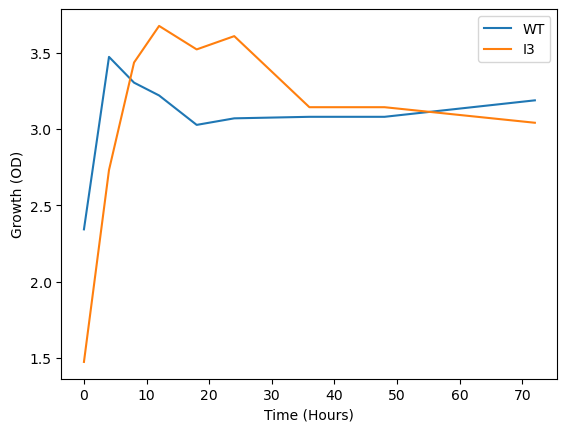

In [19]:
import matplotlib.pyplot as plt
  
# create data
x1 = WT_data[WT_data.OD600>0].Hour.tolist()
y1 = WT_data[WT_data.OD600>0].OD600.tolist()

x2 = I3_data[I3_data.OD600>0].Hour.tolist()
y2 = I3_data[I3_data.OD600>0].OD600.tolist()

# plot lines
plt.plot(x1, y1, label = "WT")
plt.plot(x2, y2, label = "I3")
plt.legend()
plt.xlabel("Time (Hours)")
plt.ylabel("Growth (OD)")
plt.show()



## Exercise

**Try on your own**

1. Which of the two strains, WT or I3, has higher growth?

2. Does this surprise you? What could be a possible explanation, knowing that I3 has been engineered? (Hint: think about the first part of this tutorial)

### 4.3 Understanding relationships between engineering & metabolism

#### 4.3.1 Glycolytic metabolites

In this section, we are going to analyze changes in the metabolite concentrations. Most of the measurements in the data
file you loaded are given in uM (microMolar) concentration units. 

We will start looking at metabolites that you are already familar with, namely glycolytic metabolites. 

In the next cell, I provide a list of some of the glycolytic metabolite ID's. You can use this list to
understand what their full names are from the data file that you loaded earlier. 

In [20]:
gly_mets = ['nad_c','pep_c','adp_c','amp_c','lac__D_c','nadp_c','atp_c','3pg_c','pyr_c']


You can use the list, gly_mets, to select only the rows you want to print out from the original data file, which
contains many more metabolites. You can do this by using the command: 
    
> .isin(list)

Here, we are selecting the set of metabolites that we are interested in (the glycolytic ones in this case).
We have stored all of them in a list called "gly_mets". We can use the above command on the pandas dataframe
that has the original data stored in it, called "metabolite_IDs". Important: the column with the metabolite
IDs is called "BiGG_id", so we have to select that column and tell pandas that that is the place to search
for the metabolites in our list. This becomes the following command:

In [ ]:
metabolite_IDs[metabolite_IDs.BiGG_id.isin(gly_mets)]

Now we can take a slice of our metabolomics data by only considering the glycolytic metabolites. 

In the "WT_data" and "I3_data" dataframes, the metabolites measurements are stored in columns. 
This makes it easy to slice this dataframe, we simply tell pandas which columns we want.

Note: you may notice that there are some rows that do not have growth measurements or metabolite measurements. 
    We will leave out these rows by telling pandas that we only want rows with OD600 > 0 (where the growth is above zero)
    
> For example, WT_data[WT_data.OD600 > 0] will select only the rows where growth is above zero

Then, we can select all the columns we want, which will correspond to our glycolytic metabolites:

In [ ]:
WT_glycolysis = WT_data[WT_data['OD600'] > 0][['Hour','OD600'] + gly_mets].set_index('Hour')
WT_glycolysis

In [ ]:
I3_glycolysis = I3_data[I3_data['OD600'] > 0][['Hour','OD600'] + gly_mets].set_index('Hour')
I3_glycolysis

Now we want to assess differences between wild-type (WT) and engineered (I3) strains. 

To do this, we can subtract the two dataframes, using the .subtract() command: 

In [ ]:
DF_diff = I3_glycolysis.subtract(WT_glycolysis,axis = 0)

DF_diff

This gives us a difference dataframe ("DF_diff") equivalent to I3 - WT

We can use this difference dataframe to plot differences in metabolite concentrations over 70 hrs

An example has been given to you below for ATP versus AMP

In [ ]:
# create data
x1 = DF_diff.index.tolist()
y1 = DF_diff.atp_c.tolist()

x2 = DF_diff.index.tolist()
y2 = DF_diff.amp_c.tolist()

# plot lines
plt.plot(x1, y1, label = "ATP")
plt.plot(x2, y2, label = "AMP")
plt.legend()
plt.xlabel("Time (Hours)")
plt.ylabel("Concentration (uM)")
plt.show()


A handy technique is to loop over every column (growth or metabolite) and plot the corresponding data
(as opposed to plotting each one by one).

***Try on your own***

Can you look through the below script to see how this was done? What is generalized in the plot above (ATP/AMP) to enable looping over the columns? Find each part of the script that has been replaced by this generalization.

The code is provided for you below, once you run it you will see the output of all the plots.

In [ ]:
##Plotting all the Glycolytic Metabolites Together
#Filter only gly_mets from DF_diff columns
#Step 1: assigning a empty list
gly_mets_list = []

# Step 2: Loop through each column name in the DataFrame DF_diff
for col in DF_diff.columns:
    # Step 3: Check if the column name ends with '_c' to add only glycolytic metabolites 
    if col.endswith('_c'):
        # Step 4: Add the column name to the list if it meets the condition
        gly_mets_list.append(col)
        
#Plotting all metabolites together
plt.figure(figsize=(12, 8))
for i in gly_mets_list:
    # Create data
    x1 = DF_diff.index.tolist()  # x-values, the timeframe
    y1 = DF_diff[i].tolist()     # y-values, diff. in metabolites growth
    # Plot the line for each column
    plt.plot(x1, y1, label=i)

# Adding legend, labels, and title after the loop
plt.legend()
plt.xlabel("Time (Hours)")
plt.ylabel("Diff. in Growth Measurements")
plt.title("Glycolytic Metabolities Measurements")

# Show all plots in one figure
plt.show()


##Plotting all metabolites separate

for i in gly_mets_list:
    # Create data
    x1 = DF_diff.index.tolist()  # x-values, the timeframe
    y1 = DF_diff[i].tolist()     # y-values, diff. in metabolites growth
    # Plot the line for each column
    plt.plot(x1, y1, label=i)

    # Adding legend, labels, and title after the loop
    plt.legend()
    plt.xlabel("Time (Hours)")

    # Show all plots in one figure
    plt.show()

## Exercise

**Try on your own**

1. Do any metabolites stand out in terms of higher concentrations in I3 versus WT?


2. Which metabolites are in higher concentrations in I3 versus WT early in the growth phase (1st 3 time points) compared to
those that increase in I3 at later time points?

3. Can you think about what might be happening in the metabolic networks that might cause these changes based on the paper?


## 4.3.2 Amino acid metabolites

## Exercise

**Try on your own**

1. Perform the same above analysis (4.3.1) but now do this for all of the amino acid metabolites instead of the glycolytic metabolites
  
2. Do any amino acids stand out in terms of higher concentrations in I3 versus WT?
 #Hint: Try to plot all amino acid measurements in one plot so that you can see the growth differences relative to each other. 

3. Which amino acids are in higher concentrations in I3 versus WT early in the growth phase (1st 3 time points) compared to
those that increase in I3 at later time points?
#Hint: Plotting amino acid measurements separately might be easier to see changes individually.

4. Can you think about what might be happening in the metabolic networks that might cause these changes?



In [ ]:
##Plotting all amino acid metabolites together
# Define amino acid metabolites list once
amino_acid_mets = [
    'gly_c', 'ala__L_c', 'val__L_c', 'leu__L_c', 'ile__L_c', 'met__L_c', 'phe__L_c', 
    'trp__L_c', 'pro__L_c', 'his__L_c', 'lys__L_c', 'arg__L_c', 'asp__L_c', 'glu__L_c', 
    'ser__L_c', 'thr__L_c', 'cys__L_c', 'tyr__L_c', 'asn__L_c', 'gln__L_c'
]

 # Extract data for WT and I3
WT_amino_acid = WT_data[WT_data['OD600'] > 0][['Hour'] + amino_acid_mets].set_index('Hour')
I3_amino_acid = I3_data[I3_data['OD600'] > 0][['Hour'] + amino_acid_mets].set_index('Hour')

# Subtract data
DF_amino_acid_diff = I3_amino_acid.subtract(WT_amino_acid, axis=0)

plt.figure(figsize=(12, 8))
for i in DF_amino_acid_diff.columns.tolist():
    # Create data
    x1 = DF_amino_acid_diff.index.tolist()  # x-values (typically time or index)
    y1 = DF_amino_acid_diff[i].tolist()     # y-values for the specific column

    # Plot each line (data series)
    plt.plot(x1, y1, label=i)

# Add a legend and labels after the loop
plt.legend()
plt.xlabel("Time (Hours)")
plt.ylabel("Diff. in Amino Acid measurements")  # Set the y-label once, outside the loop
plt.title("Amino Acid Measurements Over Time")  # Optional title

# Show the plot
plt.show()